## _Step 0:_ Imports

**NOTE** : For Task 4, we took the liberty of installing an additional library (holidays) that allowed us to manage Italian holidays. 

If you wish to run this notebook, feel free to install it with ```pip install holidays ```.

---

In [1]:
# Imports
import pandas as pd
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date, timedelta
import holidays

## _Step 1:_ Loading the data

The data has been loaded from three separate files.

- *articles.tsv.gz* was loaded using pd.read_csv(), and tabs as separators were specified because it is a .tsv (Tab Separated Value) file. Additionally, data with a non conforming format has been, as suggested, ignored using 'error_bad_lines'.
- *mapping.pickle* has been loaded using pd.read_pickle(), the resulting was in the format of a dictionary. After that, it has been converted into a Pandas Dataframe, with two columns, *English* and *Italian*.
- Finally, *topics.jsonl.gz* was loaded using pd.read_csv(), with lines=True to conform with the format jsonl.

We set the indexes of the dataframes according to the structure of each dataset, and also checked that they were unique.

---

In [2]:
# Defining constants
DATA_FOLDER = 'data/'
ARTICLES_PATH = DATA_FOLDER + 'articles.tsv.gz'
MAPPING_PATH = DATA_FOLDER + 'mapping.pickle'
TOPICS_PATH = DATA_FOLDER + 'topics.jsonl.gz'

# Loading articles.tsv.gz
articles = pd.read_csv(ARTICLES_PATH, sep= '\t', error_bad_lines = False).set_index('index')

# Loading mapping.pickle
m = pd.read_pickle(MAPPING_PATH)
mapping = {}
mapping['English'] = list(m.keys())
mapping['Italian'] = list(m.values())
mapping = pd.DataFrame.from_dict(mapping)

# Loading topics.jsonl.gz
topics = pd.read_json(TOPICS_PATH, lines = True).set_index('index')

b'Skipping line 7: expected 944 fields, saw 945\n'


## _Step 2:_ Filtering the data
---
### **Task 2**

We simply filter out the rows for which the name of the supposed article starts with " Discussione:", as it is not really an article. The resulting dataframe would therefore contain only articles.

**NOTE** : From now on, we are only processing and considering articles that do not start with "Discussione".


In [3]:
# Dropping "Discussione:" rows
articles = articles[np.invert(articles.index.str.startswith('Discussione:'))]

## *Step 3*: Understanding the data

---
### **Task 3.1**

#### *Subtask* 3.1.1

Since we know that the indices of articles are unique, we simply take the length of that dataframe to get the number of articles. Regarding the topics, their name is the name of each column of the relative dataframe, so we just take the number of these columns. We also print all the topics to get a general idea of what they are about. 

In [4]:
topics_num = len(topics.columns)
articles_num = len(articles.index.values)

print(f'The total number of topics is {topics_num}, while the total number of articles is {articles_num}')

The total number of topics is 64, while the total number of articles is 55791


To get an idea of the topics, here they are:

In [5]:
print("Topics:\n" , '\n'.join(list(topics.columns.values)))

Topics:
 Geography.Regions.Asia.Central Asia
Geography.Regions.Europe.Eastern Europe
History and Society.Military and warfare
Culture.Media.Television
History and Society.Education
Culture.Media.Books
Geography.Regions.Africa.Africa*
Culture.Visual arts.Architecture
Culture.Biography.Women
Geography.Regions.Americas.North America
STEM.STEM*
Culture.Performing arts
Culture.Literature
History and Society.Politics and government
Geography.Regions.Africa.Northern Africa
STEM.Earth and environment
Geography.Regions.Africa.Central Africa
STEM.Medicine & Health
STEM.Libraries & Information
Geography.Regions.Europe.Europe*
Geography.Regions.Europe.Western Europe
Culture.Media.Radio
STEM.Space
Culture.Visual arts.Comics and Anime
STEM.Technology
Culture.Internet culture
Culture.Media.Software
Geography.Regions.Asia.East Asia
Geography.Regions.Europe.Southern Europe
STEM.Biology
Culture.Food and drink
History and Society.Business and economics
Culture.Visual arts.Fashion
Geography.Regions.Americ

#### *Subtask* 3.1.2

We sum the pageviews of all articles for each day, and then we compute the daily mean of these values. 

In [6]:
mean = articles.sum(axis = 0).mean()
print(f'The average daily number of pageviews is {mean:.2f}')

The average daily number of pageviews is 324267.67


#### *Subtask 3.1.3*

The average daily number of pageviews in our dataset is 324,267.67. Comparing this number with the average daily pageviews of the Italian Wikipedia within the same period *(1/1/2018 - 7/31/2020)*, which is 5,731,987, we observe that the dataset consists of approximately __5.66%__ (324,267.67/5,731,987) of the Italian Wikipedia pages.

### **Task 3.2**

#### *Subtask* 3.2.1

In [7]:
# Selecting the articles that contain the word "virus" and with more than 7000 pageviews and printing them
virus_articles = articles[articles.index.str.lower().str.contains('virus') & (articles.sum(axis = 1) >= 7000)]
virus_articles.columns = pd.to_datetime(virus_articles.columns)
virus_articles

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
index,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,34,...,13,12,13,9,6,10,11,7,7,8
Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,18,...,142,30,25,126,30,27,147,25,39,146
Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,60,...,37,27,30,70,36,39,39,35,35,44
Rhinovirus,6,9,12,22,13,12,21,18,19,15,...,8,10,10,13,6,14,10,8,9,14
Virus_(informatica),26,70,74,66,86,44,67,94,107,168,...,21,38,21,18,30,24,33,28,22,17
Herpesvirus_umano_3,2,5,5,14,6,13,9,12,11,5,...,10,9,10,5,7,8,13,5,9,8
Antivirus,19,31,26,27,42,30,24,54,45,80,...,16,33,25,14,14,19,23,23,22,12
Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,19,...,11,10,10,4,4,9,4,12,5,7


#### *Subtask* 3.2.2

We display the data in a trellis of plots.
- We create two plots: the first one is to have the same Y axis between the subplots, as it should be done.
- In the second plot the Y axis is not shared, this is done intentionally to have a better sense of how the number of pageviews changes for each article, without relating articles to eachother.
- After plotting the original data, we observe that it is very noisy. 
- Therefore, we smooth it by applying a rolling mean with a _centered_ window of 15 elements, to better visualize the pageviews trend. The rolling mean in centered to prevent shifting the data to the right. 
- To get a sense of how that changes the data, in the secondo plot we show both the original noisy data in the background, and the smoothed data in the foreground, while in the first one we just show the smoothed data.
- Additionally, we highlight the specific dates of interest, which are 2020-31-01 and 2020-21-02. 
- We used a colorblind friendly palette to plot the data.

**NOTE**: The X axis ticks are set one every 60 days to avoid confusion and overlapping of the text.

In [8]:
def plot_pageviews_trend(virus_articles, sharey=True):
    """
    This function is used to plot the trend of pageviews for virus articles. Please note that, depending on the value of sharey parameter, the plot changes.
    If sharey == True: all the subplots share the same y axis, the function plots just the rolling mean (without the noisy data in the background), and
        the dates of interest (31/01/2020 and 21/02/2020) are highlighted with two vertical lines.
    If sharey == False: the subplots don't share the same y axis, the function plots both the rolling mean and the noisy data in the background. 
        To better understand which was the real number of pageviews during the aforementioned days, this is plotted as a dot, for each day.
    """
    
    # Creating the trellis of plots.
    fig, axs = plt.subplots(4, 2, constrained_layout=True, figsize= (15, 15), sharey=sharey)

    # Getting the pageviews of two specific days for each virus article
    january = virus_articles[['2020-01-31']].values
    february = virus_articles[['2020-02-21']].values

    # Setting the title
    plt.suptitle('Pageviews trend for virus articles', horizontalalignment = 'center',  fontsize = 18)

    for i in range(virus_articles.shape[0]):
        row = i//2 
        col = i%2
 
        # Plotting with smoothing average.
        smoothed_data, = axs[row, col].plot(virus_articles.columns, virus_articles.iloc[i].rolling(15,center=True).mean(), color='#d6604d', zorder = 2)
        
        if not sharey:
            # Plotting with noise
            noisy_data, = axs[row, col].plot(virus_articles.columns, virus_articles.iloc[i], alpha=0.3, color='#92c5de', zorder = 1)
            
            # Plotting the dates of interest as dots 
            first_day = axs[row, col].scatter(['2020-01-31'], january[i], color = '#4393c3', s = 50, zorder = 3)
            second_day = axs[row, col].scatter(['2020-02-21'], february[i], color = '#67001f', s = 50, zorder = 3)
            
        else:
            # Plotting the dates of interest with lines     
            first_day = axs[row, col].axvline(x=date(2020, 1, 31), color='#4393c3', linestyle='-.', zorder = 3)
            second_day = axs[row, col].axvline(x=date(2020, 2, 21), color='#67001f', linestyle=':',  zorder = 3)

        # Setting titles and labels and adjusting plot parameters
        axs[row, col].set_title(virus_articles.index[i].replace("_", " "), fontsize = 16)
        axs[row, col].set_xlabel('Date', fontsize = 14)
        if col % 2 == 0:
            axs[row, col].set_ylabel('Number of visits', fontsize = 14)
        axs[row, col].set_xticks(virus_articles.columns[::60])
        axs[row, col].margins(x=0)
        axs[row, col].yaxis.set_tick_params(labelleft=True)

        # Rotating x-labels
        for label in axs[row, col].get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')

        # Adding the legend only once.
        if i == 1:
            first_day.set_label('Views on 31 Jan 2020')
            second_day.set_label('Views on 21 Feb 2020')
            if not sharey:
                noisy_data.set_label('Original data, no filter applied')
            smoothed_data.set_label('Smoothed data (rolling mean of 15 days)')
            axs[row, col].legend(fontsize = 10)
          

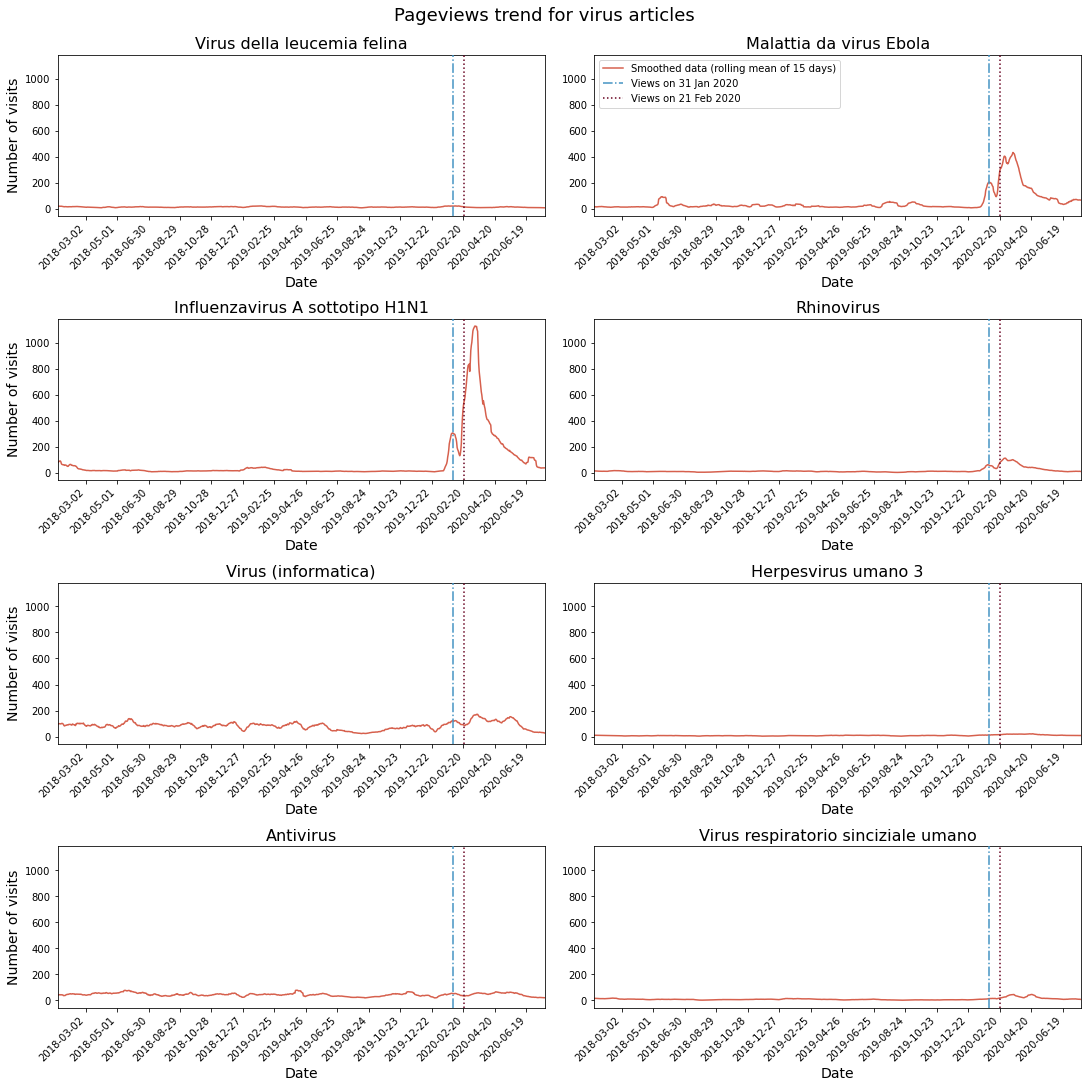

In [9]:
# Plotting with a shared y axis
plot_pageviews_trend(virus_articles)

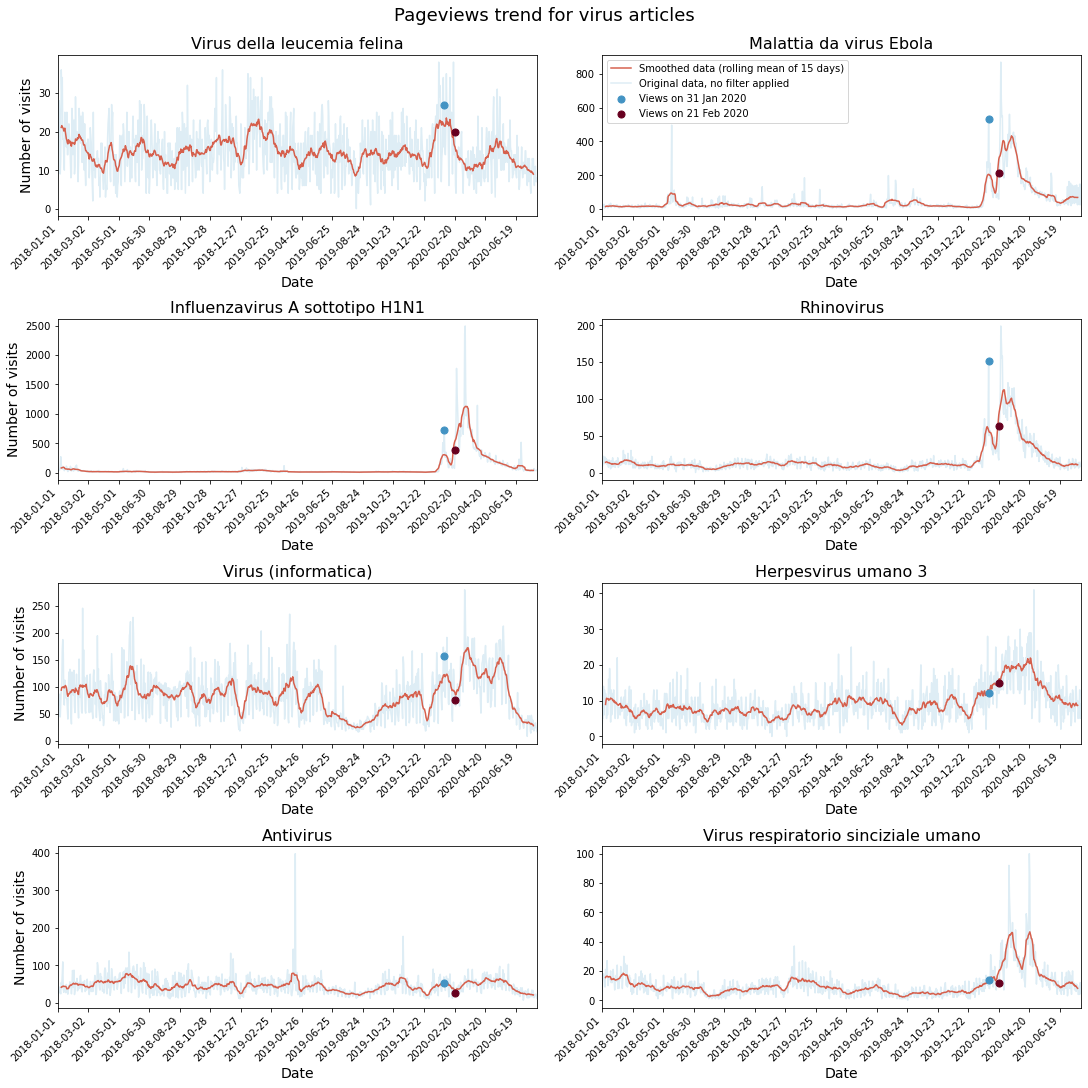

In [10]:
# Plotting with different y axis
plot_pageviews_trend(virus_articles, sharey=False)

#### *Subtask* 3.2.3

- We notice that every article related to human viruses have had a spike of interest during a speicific period, which corresponds to the outbreak of COVID-19 in Italy. 
- We also notice that every other article that contains the word virus, but isn't related to human viruses (i.e computer viruses, or animal viruses) have not had such a spike, 
   with the exception of the article *Virus (Informatica)*, which could highlight a mistake by the user of Wikipedia when looking for human viruses, as the spike is not that high.
- Additionally, we observe that not all viruses have had the same spike of interest. For instance, the H1N1 virus had a spike of 2500 pageviews per day. This could possibly be explained by the fact that H1N1 shares similar symptoms with COVID-19.
- It is also possible to notice that in April 2019 the article "Antivirus" received an abnormal amount of visits. We will investigate to understand what happened that month, regarding cyber threats.

### **Task 3.3**

#### *Subtask* 3.3.1

We take the total number of views of each article across all days in the data set. We use the provided function to get the CDF with respect to the number of pageviews.

In [11]:
def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

# Computing the total number of views for each article. 
pageviews = articles.sum(axis=1).values

# Computing the CDF. 
x, y = get_cdf(pageviews)

#### *Subtask 3.3.2*

We plot the CDF of the pageviews according to the different provided scales.

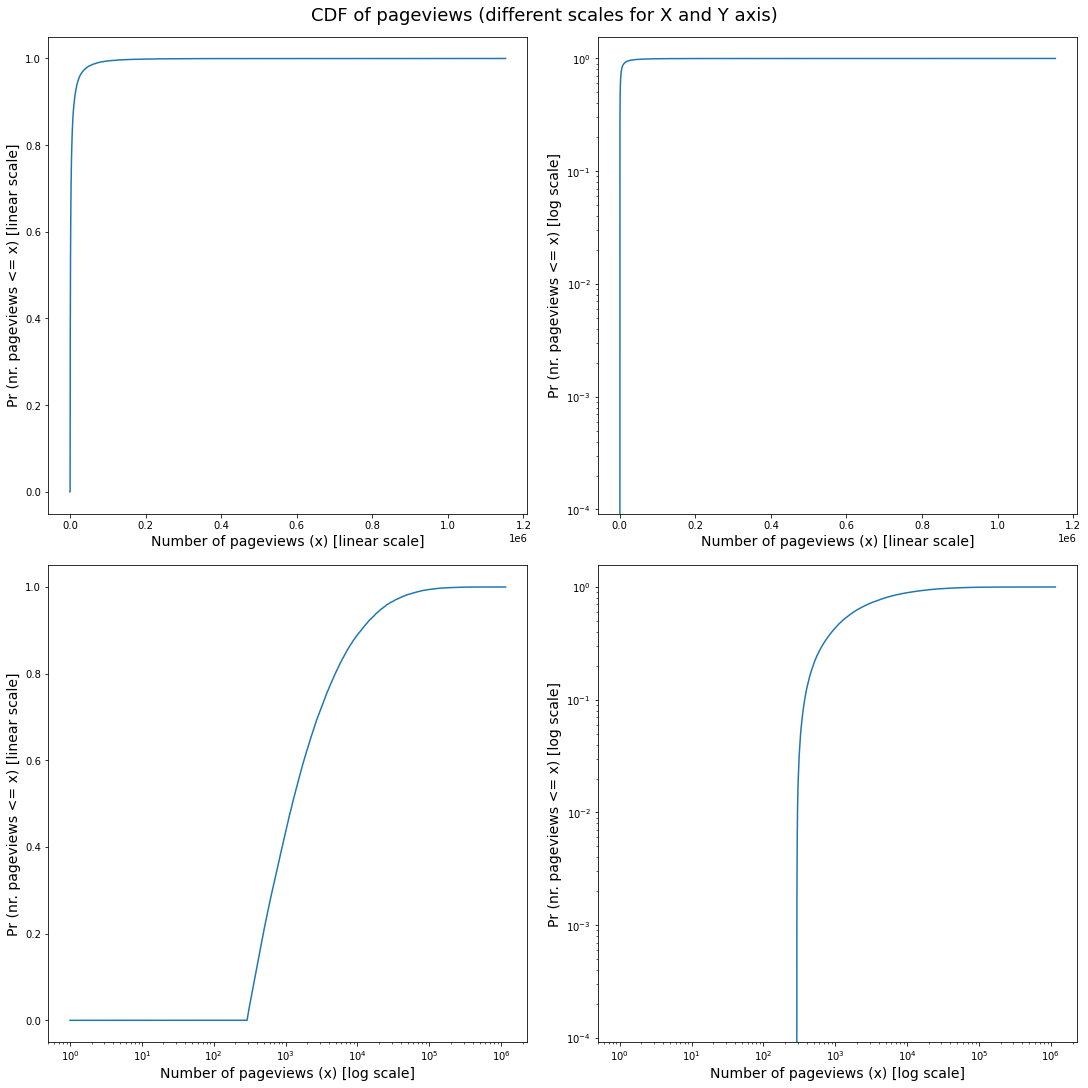

In [12]:
# Setting the number of subplots
fig, ax = plt.subplots(2, 2, figsize=(15,15), constrained_layout=True)

# Creaing an array with all the possible scales for x and y axis
scales = ['linear', 'log']

# Setting the title
plt.suptitle('CDF of pageviews (different scales for X and Y axis)', horizontalalignment = 'center',  fontsize = 18)

for n in range(4):
        i = n//2
        j = n%2
        
        # Plotting the data
        ax[i, j].plot(x, y)
        ax[i, j].set_xscale(scales[i])
        ax[i, j].set_yscale(scales[j])
        
        # Setting the labels
        ax[i, j].set_xlabel(f'Number of pageviews (x) [{scales[i]} scale]', fontsize=14)
        ax[i, j].set_ylabel(f'Pr (nr. pageviews <= x) [{scales[j]} scale]', fontsize=14)

#### *Subtask 3.3.3*

In [13]:
print(f"Minimum pageviews nb: {min(pageviews)}\nMaximum pageviews nb: {max(pageviews)}")

Minimum pageviews nb: 291
Maximum pageviews nb: 1152767


- **Oddity**: From the third plot (X scale: log, Y scale: linear) it is possible to notice that there are no articles with less than 300 views in our dataset (291 to be precise, if we compute the real value). For this reason the CDF is a flat line before 300 in this plot. It's also possible to realize that the 80% of the articles, more or less, have a number of pageviews between 291 and 5000.
- It's also important to notice that this kind of plot, in our case, is the best way to visualize the CDF: logarithmic scale on Y axis does not make sense since it is a probability. Additionally, for the X axes the linear scale doesn't let us understand what is going on, since the interval between the minimum and the maximum value is large.

### **Task 4.1**

#### *Subtask* 4.1.1

At first we plot the total number of pageviews for the year 2020, summing, for each day, the pageviews of each article. We notice something weird in the plot... What is going on?

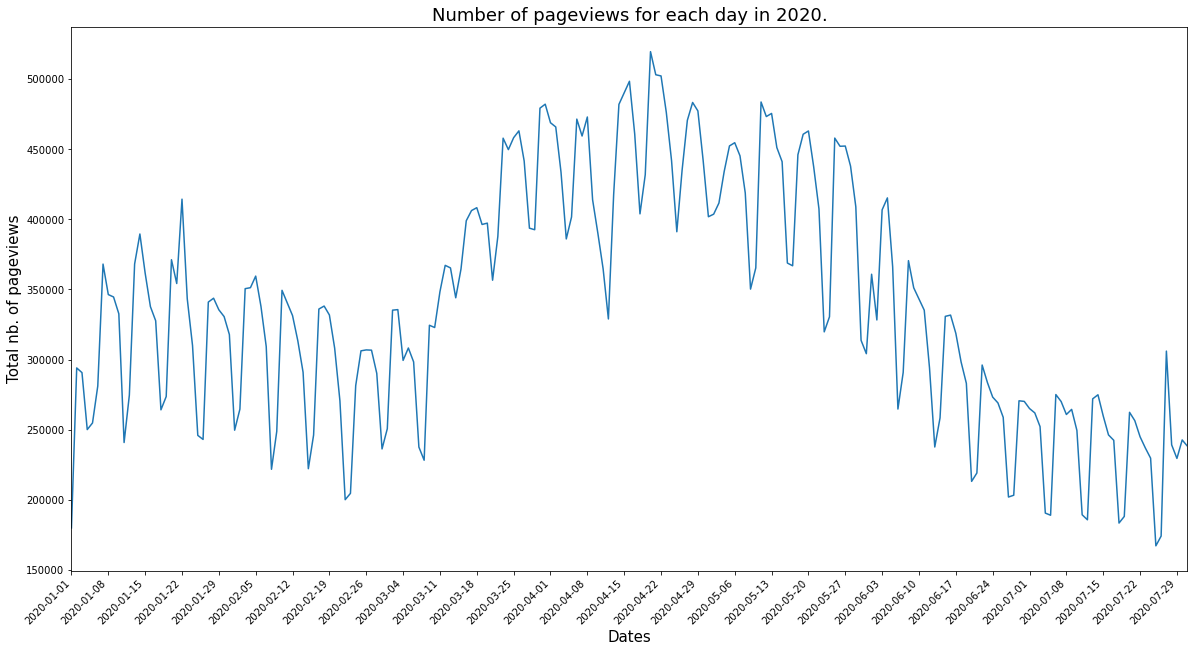

In [14]:
# Getting the range of dates for the year 2020 (our dataset stops at the 31st of July).
dates_2020 = pd.date_range('2020-01-01', '2020-07-31', freq='D')

# Converting the articles' columns from string to datetime
articles.columns = pd.to_datetime(articles.columns)

# Computing the total nb. of pageviews for each day
pageviews_2020 = articles[dates_2020].sum(axis=0)

# Plotting the result
plt.figure(figsize=(20,10))
plt.plot(pageviews_2020)
plt.title("Number of pageviews for each day in 2020.",fontsize=18)
plt.xlabel("Dates",fontsize=15)
plt.ylabel("Total nb. of pageviews",fontsize=15)
plt.margins(x = 0)
plt.xticks(dates_2020[::7], rotation = 45, ha='right'); # The ';' is to suppress the output of the command

#### *Subtask* 4.1.2

We notice that during holidays (weekends and other national festivities) Italian people tend to consult Wikipedia a lot less than duing business days. This pattern must be removed to get a better sense of 2020 Wikipedia pageviews.

We plot the pattern to prove what we are claiming.

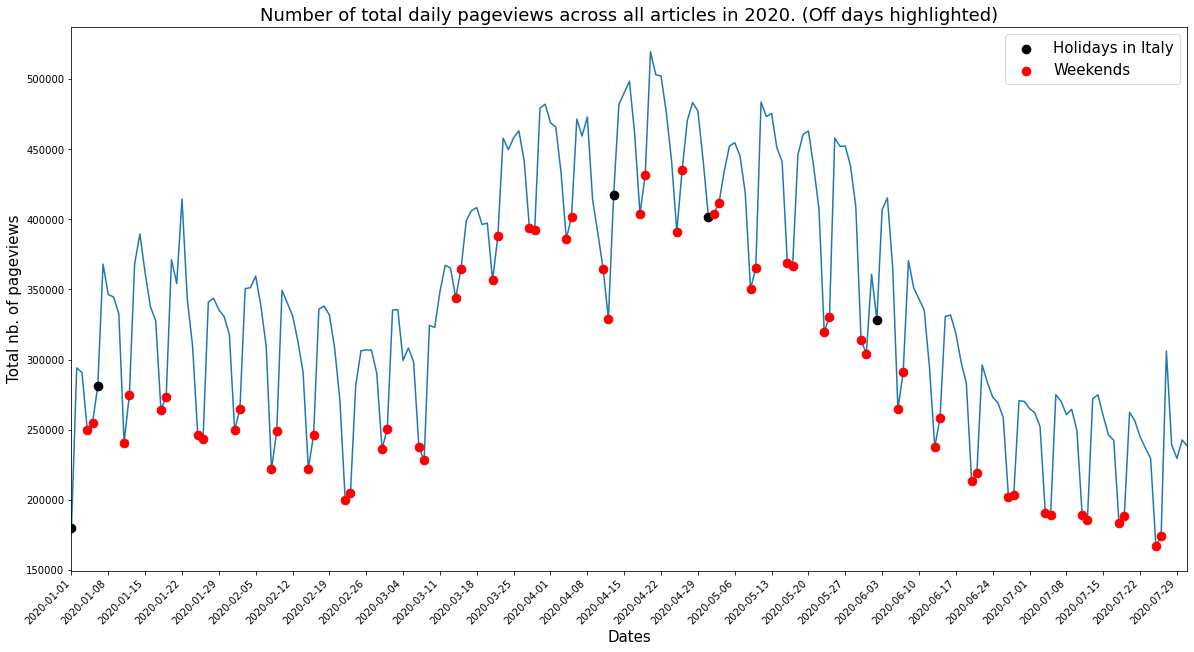

In [15]:
# From the library holidays we take the list of Italian holidays
it_holidays = holidays.Italy()

# Taking the 2020 business days (excluding Saturdays, Sundays)
business_dates_2020 = pd.date_range('2020-01-01', '2020-07-31', freq='B')

# Dropping business days from the 2020 dates (to get only the weekends)
weekends_2020 = dates_2020.drop(business_dates_2020)

# Taking italian holidays for the year 2020 (weekends excluded, only other national holidays)
holiday_dates_it_2020 = business_dates_2020[[day in it_holidays for day in business_dates_2020.date]]

# Computing the pageviews for the year 2020 only in the weekends and during the holidays
pageviews_weekend_2020 = articles[weekends_2020].sum(axis=0)
pageviews_holidays_2020 = articles[holiday_dates_it_2020].sum(axis=0)

# Plotting the total nb. of pageviews for 2020 highlighting the weekends and the national holidays 
plt.figure(figsize=(20,10))
dots_ho = plt.scatter(holiday_dates_it_2020,pageviews_holidays_2020,color='black',s=75,zorder=3)
dots_ho.set_label("Holidays in Italy")
dots_we= plt.scatter(weekends_2020,pageviews_weekend_2020,color="#FF0000",s=75,zorder=3)
dots_we.set_label("Weekends")

# Setting title, labels and tuning plot parameters
plt.legend(fontsize=15)
plt.title("Number of total daily pageviews across all articles in 2020. (Off days highlighted)",fontsize=18)
plt.xlabel("Dates",fontsize=15)
plt.ylabel("Total nb. of pageviews",fontsize=15)
plt.plot(pageviews_2020) 
plt.margins(x = 0)
plt.xticks(dates_2020[::7], rotation = 45, ha='right'); # The ';' is to suppress the output of the command

#### *Subtask* 4.1.3

We remove the pattern to have a better visualization.

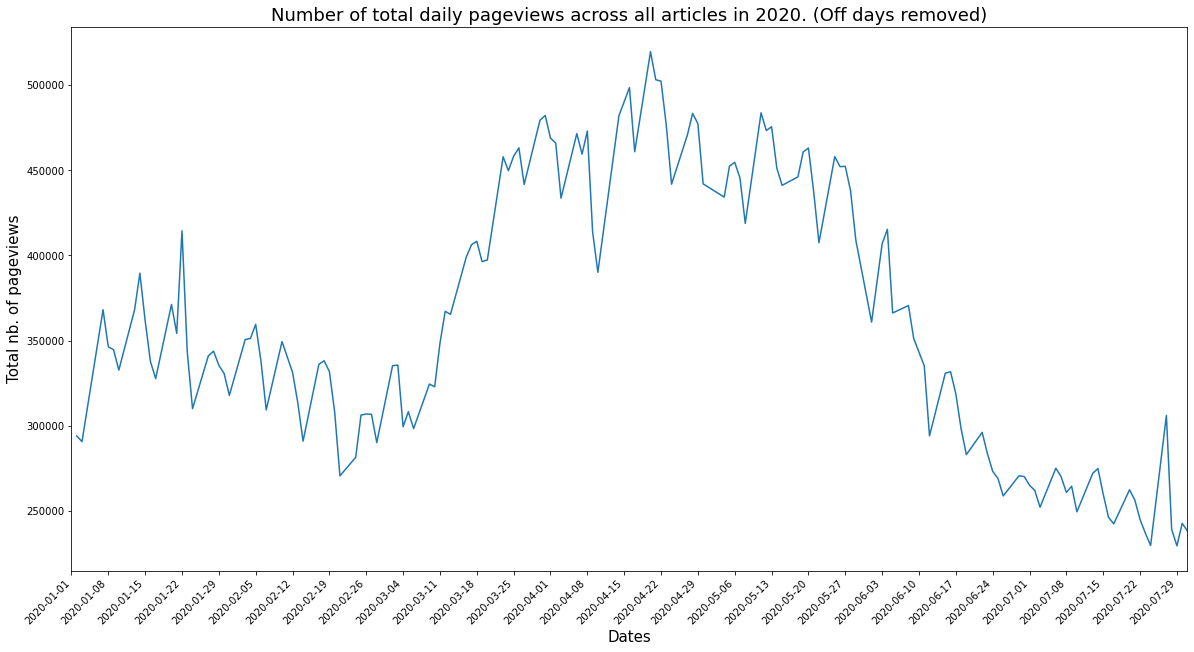

In [16]:
# Getting only italian business days in the year 2020, removing holidays and other festivities
business_dates_it_2020 = business_dates_2020[[day not in it_holidays for day in business_dates_2020.date]]

# Computing the total nb. of pageviews for these business days
pageviews_business_it_2020 = articles[business_dates_it_2020].sum(axis=0)

# Plotting the result
plt.figure(figsize=(20,10))
plt.title("Number of total daily pageviews across all articles in 2020. (Off days removed)",fontsize=18)
plt.xlabel("Dates",fontsize=15)
plt.ylabel("Total nb. of pageviews",fontsize=15)
plt.plot(pageviews_business_it_2020)
plt.margins(x = 0)
plt.xticks(dates_2020[::7], rotation = 45, ha='right'); # The ';' is to suppress the output of the command

### **Task 4.2**

#### *Subtask* 4.2.1

To compare Italian Wikipedia pageviews between 2019 and 2020, we overlap the two plots. Notice that, since the data for 2020 stops at the 31st of July, we take the same period for the year 2019. We preprocess the data for 2019 in the same way as Task 4.1. To make the two timeseries overlap and to compare them, we remove the year from them, taking just the day and the month.

Also, we highlight the entire italian lockdown period and not just its starting date. Since the requirement was to highlight only the starting date, please notice that it corresponds to the beginning of the highlighted portion of the plot.

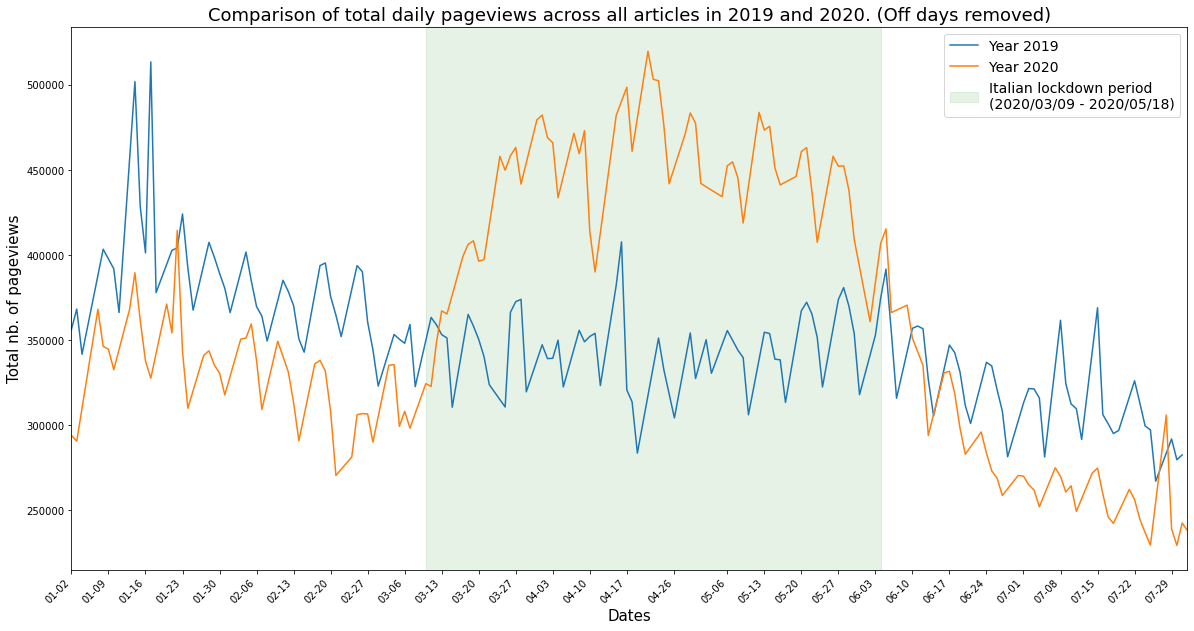

In [17]:
# Taking the 2019 business days, excluding weekends and holidays
business_dates_2019 = pd.date_range('2019-01-01', '2019-07-31', freq='B')
business_dates_it_2019 = business_dates_2019[[day not in it_holidays for day in business_dates_2019.date]]

# Summing the pageviews for each business day of 2019
pageviews_business_it_2019 = articles[business_dates_it_2019].sum(axis=0)

# Removing the year from the time series of 2019
months_range_2019 = business_dates_it_2019.strftime('%m-%d')

# Taking the dates of beginning and end of Italian lockdown. The tm_yday allows us to associate a day to a number in the range [1, 366]
# For more info: https://docs.python.org/3/library/time.html#time.struct_time
day_09_03 = date(2020, 3, 9).timetuple().tm_yday
day_03_06 = date(2020, 6, 3).timetuple().tm_yday

# Taking the days in aforementioned format for both years
days_2019 = [d.timetuple().tm_yday for d in business_dates_it_2019.date]
days_2020 = [d.timetuple().tm_yday for d in business_dates_it_2020.date]

# Creating the two Series to overlap
pageviews_months_2019 = pd.Series(index= days_2019, data=pageviews_business_it_2019.values)
pageviews_months_2020 = pd.Series(index= days_2020, data=pageviews_business_it_2020.values)

# Plotting the result
plt.figure(figsize=(20,10))
plt.title("Comparison of total daily pageviews across all articles in 2019 and 2020. (Off days removed)",fontsize=18)
plt.xlabel("Dates",fontsize=15)
plt.ylabel("Total nb. of pageviews",fontsize=15)
plot_2019, = plt.plot(pageviews_months_2019)
plot_2020, = plt.plot(pageviews_months_2020)

# Higlighting the lockdown period
lockdown_period = plt.axvspan(day_09_03, day_03_06, color='green', alpha=0.1)

# Adjusting the ticks and other parameters
plt.xticks(ticks=days_2019[::5], labels=months_range_2019[::5], rotation = 45, ha='right')
plt.margins(x = 0)
plot_2019.set_label('Year 2019')
plot_2020.set_label('Year 2020')
lockdown_period.set_label('Italian lockdown period \n(2020/03/09 - 2020/05/18)')
plt.legend(fontsize = 14);

#### *Subtask* 4.2.2

We clearly notice that, during the lockdown, Italian people tended to consult Wikipedia more, while in other periods of the year the trend between 2019 and 2020 is almost the same. Why did this happen? One possible reason could be related to the analysis done in **Task 3.2**: scared by the pandemic, people started to compulsively search for Covid-19 and other viruses on Wikipedia, to understand better what was going on. Also, the "smart working" (remote working) and the online school classes could have had an impact on this trend: people could have started to consult Wikipedia to configure their systems.


## *Step 5*: Fiddling with Topics

---

### **Task 5.1**

To have a result like the one in the example, we firstly melt the Topics and Articles dataframes in order to have:
- Melting Topics - for each article, for each topic: True if the article is in that topic, False otherwise. We then take only rows with a True value.
- Melting Articles - for each article, for each day: the number of pageviews the article received in that day.

We merge the just obtained dataframes, with the help of the mapping (in the Articles df articles' name is in Italian, in the Topics df it is in English).

Finally, we compute the total number of pageviews for each topic, for each day. We then show a portion of the result.

**NOTE**: one article can be related to more than one topic, for this reason we decided to count its pageviews for all of its topics. This means that, if you sum the total number of pageviews for each day across all topics, the result could be different from the sum of pageviews for each day in the Articles dataframe. This decision has been made because there is no "Principal topic" and "Secondary topics" for the articles, but every topic has the same weight and so we would not know which topic to exclude for each article otherwise.

In [18]:
def query_topics_pageview_day():
    """
    This function returns a DataFrame with 3 columns.
    The first column (Topics) is the index, the second one (Date) is a day and the last one (Pageviews) is the total number of pageviews for that topic, for that day.
    Please notice that one article can belong to more than one topic. In this case its pageviews will be counted more than once.
    """
    
    # Performing an unpivot of topics and getting rows to which articles belong (value=True)
    topics_melted = topics.melt(ignore_index=False, var_name='Topic').query('value==True').drop('value', axis=1)
    
    # Performing an unpivot of articles
    articles_melted = articles.melt(ignore_index=False, var_name='Date', value_name='Pageviews')
    
    # Joining topics_melted, mapping, articles_melted to have topics to which articles belong
    articles_topics = articles_melted.merge(mapping, left_index=True, right_on='Italian').merge(topics_melted, left_on='English', right_index=True)
    
    # Grouping by topic and date and aggregating by pageviews sum (total number of pageviews, for each topic, for each day)
    topics_pageview_day = articles_topics.groupby(['Topic', 'Date'], as_index=False).sum().set_index('Topic')
    
    # Converting each date from string to date type
    topics_pageview_day.Date = pd.to_datetime(topics_pageview_day.Date).dt.date
    
    return topics_pageview_day

In [19]:
topics_pageview_day = query_topics_pageview_day()

# Printing the result
topics_pageview_day

,Date,Pageviews
Topic,,
Culture.Biography.Biography*,2018-01-01,58085
Culture.Biography.Biography*,2018-01-02,86933
Culture.Biography.Biography*,2018-01-03,88693
Culture.Biography.Biography*,2018-01-04,94648
Culture.Biography.Biography*,2018-01-05,90808
...,...,...
STEM.Technology,2020-07-27,11507
STEM.Technology,2020-07-28,11023
STEM.Technology,2020-07-29,11131


### **Task 5.2**

We want to plot the average number of pageviews each topic received during two periods: 35 days before the quarantine and 34 days after the quarantine started. We also have a constraint: the plot must fit the size of an A4 paper (8.27 x 11.69 inches).
Since the number of topics is 64, and each topic name is a long string, we decide to put the topics on the Y axis, while the X axis represents the mean. 

At first, we think to use a strip plot, each dot represents the average number of pageviews a topic received for each one of the two periods. We also choose to use a color palette to better distinguish this number between the topics: as you can see in the following plot, the lighter the color, the higher the mean.

Unfortunately, the space between topics' names is not large, because of the constraint. We could make the text smaller, but this would result in a text not easy to read.

In [20]:
def topic_groups_per_period(df, start, end):
    """
    Given a table like the one of Task 5.1, this function returns a subset of it for a given period (start <= Date < end) grouped by Topic.
    It also returns the mean of pageviews for each topic during the given period.
    """
    
    # Computing the result
    result = df[(df.Date >= start) & (df.Date < end)].groupby('Topic')
    
    return result, result.mean()

In [21]:
# Getting the pageviews for each topic, for each day (and their mean) between 03/02/2020 and 09/03/2020
before_quarantine, before_quarantine_mean = topic_groups_per_period(topics_pageview_day, start=date(2020, 2, 3), end=date(2020, 3, 9))

# Getting the pageviews for each topic, for each day (and their mean) between 09/03/2020 and 12/04/2020
during_quarantine, during_quarantine_mean = topic_groups_per_period(topics_pageview_day, start=date(2020, 3, 9), end=date(2020, 4, 12))

In [22]:
def get_stripplot_quarantine(before_quarantine_mean, during_quarantine_mean):
    """
    This function plots the comparison between the average amount of pageviews for each topic during the 35 days before the Italian quarantine 
        and the average amount of pageviews for each topic during the quarantine (34 days).
    The plot has roughly the size of an A4 page.
    """
    
    # Creating figure (A4 page size) composed by two subplots
    fig, axs = plt.subplots(1,2, constrained_layout=False, figsize= (8.27, 11.69), sharex=True)
    
    # Color palette: the lighter is the color, the more pageviews that topic has received
    palette = sns.color_palette("viridis_r", len(before_quarantine_mean))
    
    # To have the palette sorted in an horizontal visualization (https://stackoverflow.com/a/38575399)
    rank_before = before_quarantine_mean.Pageviews.argsort().argsort()
    rank_during = during_quarantine_mean.Pageviews.argsort().argsort()
    
    # Creating and centering the title of the entire plot
    plt.suptitle('Average number of pageviews \nbefore and during italian COVID-19 quarantine (for each topic)', horizontalalignment = 'center', y =0.95, fontsize = 18)
    
    # Plotting before quarantine period
    sns.stripplot(y = before_quarantine_mean.index, x = before_quarantine_mean.Pageviews, size=10, orient="h",
      palette=np.array(palette[::-1])[rank_before], linewidth=1, edgecolor="w", ax=axs[0])

    # Plotting during quarantine period
    sns.stripplot(y = during_quarantine_mean.index, x = during_quarantine_mean.Pageviews, size=10, orient="h",
     palette=np.array(palette[::-1])[rank_during], linewidth=1, edgecolor="w", ax=axs[1])
    
    # Setting grid and labels for the first plot
    axs[0].grid(True)
    axs[0].set_xlabel('Avg. pageviews nb.\n(Before quarantine)', fontsize = 14)
    axs[0].set_ylabel('Topics', fontsize = 14)
    [tick.set_fontsize(9) for tick in axs[0].get_yticklabels()]
    
    # Setting grid and labels for the second plot
    axs[1].set_xlabel('Avg. pageviews nb.\n(During quarantine)', fontsize = 14)
    axs[1].grid(True)
    axs[1].set_yticklabels(['' for x in during_quarantine_mean.index]) # To preserve horizontal lines without repeating the topics name
    axs[1].set_ylabel('')
    
    # Hiding the right border
    sns.despine(right = True)

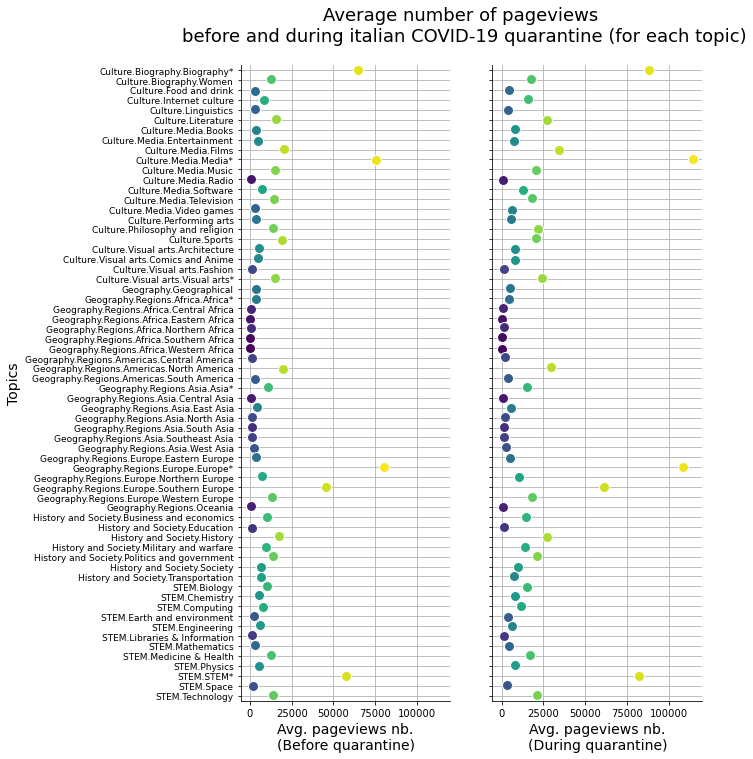

In [23]:
get_stripplot_quarantine(before_quarantine_mean, during_quarantine_mean)

**Wait**: aren't we forgetting something? We are plotting a mean, where is its confidence interval? 
To plot it, at first we create a function to compute it (compute_CI), and then we change the type of plot, since the strip plot doesn't allow us to visualize it properly.

In [24]:
def compute_CI(data, ndraws = 1000):
    """
    This function returns the confidence interval for the mean of a given array. The confidence level is 95%.
    The confidence interval is obtained with the bootstrap technique. We return this because the matplotlib.errorbar function substracts
    this value from the mean instead of using it as is. Therefore, by returning these value, we get a confidence interval as one can expect.
    """

    # Size of the sample : half the data.
    size = len(data)//2
    means = []
    
    # Computing the true mean of the given data.
    true_mean = np.mean(data)
    
    # Sampling/Bootstrapping data
    for n in range(ndraws):
        indices = np.random.permutation(len(data))
        d = data[indices[:size]]
        means.append(np.nanmean(d))
    
    return [true_mean-np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)-true_mean]

In [25]:
# Computing confidence intervals for two periods of interest: Before quarantine and during quarantine.
before_CI = np.array([compute_CI(group['Pageviews']) for _, group in before_quarantine]).T
during_CI = np.array([compute_CI(group['Pageviews']) for _, group in during_quarantine]).T

In [26]:
def get_barplot(before_quarantine_mean, during_quarantine_mean, before_CI, during_CI, xscale='linear'):
    """
    This function plots the comparison between the average amount of pageviews for each topic during the 35 days before the Italian quarantine 
        and the average amount of pageviews for each topic during the quarantine (34 days), on a bar plot, with the addition of confidence intervals (confidence level = 0.95)
        for each topic. The parameter xscale can be set to either linear or logarithmic for different visualizations of the data. 
    The plot has roughly the size of an A4 page.
    """
    
    # Creating figure (A4 page size) composed by two subplots
    fig, axs = plt.subplots(1,2, constrained_layout=False, figsize= (8.27, 11.69), sharex=True)

    # Color palette: the lighter is the color, the more pageviews that topic has received
    palette = sns.color_palette("rocket_r", len(before_quarantine_mean))
    
    # To have the palette sorted in an horizontal visualization (https://stackoverflow.com/a/38575399)
    rank_before = before_quarantine_mean.Pageviews.argsort().argsort()
    rank_during = during_quarantine_mean.Pageviews.argsort().argsort()

    # Creating and centering the title of the entire plot
    plt.suptitle('Average number of pageviews \nbefore and during italian COVID-19 quarantine (for each topic)', horizontalalignment = 'center', y =0.95, fontsize = 18)

    # Plotting before quarantine period
    axs[0].errorbar(y = before_quarantine_mean.index, x = before_quarantine_mean.Pageviews, xerr = before_CI, yerr = None, ls = 'none', color = 'blue', elinewidth = 2)
    sns.barplot(y = before_quarantine_mean.index, x = before_quarantine_mean.Pageviews, palette=np.array(palette[::-1])[rank_before], ax=axs[0])

    # Plotting during quarantine period
    axs[1].errorbar(y = during_quarantine_mean.index, x = during_quarantine_mean.Pageviews, xerr = during_CI, yerr = None, ls = 'none', color = 'blue', elinewidth = 2)
    sns.barplot(y = during_quarantine_mean.index, x = during_quarantine_mean.Pageviews, palette=np.array(palette[::-1])[rank_during], ax=axs[1])

    # Setting grid and labels for the first plot
    axs[0].xaxis.grid(True)
    axs[0].yaxis.grid(False)
    axs[0].set_xlabel('Avg. pageviews nb.\n(Before quarantine)', fontsize = 14)
    axs[0].set_ylabel('Topics', fontsize = 14)
    axs[0].set_xscale(xscale)
    [tick.set_fontsize(9) for tick in axs[0].get_yticklabels()]
    
    # Setting grid and labels for the second plot
    axs[1].set_xlabel('Avg. pageviews nb.\n(During quarantine)', fontsize = 14)
    axs[1].set_yticklabels(['' for x in during_quarantine_mean.index])
    axs[1].set_ylabel('')
    axs[1].xaxis.grid(True)
    axs[1].yaxis.grid(False)
    axs[1].set_xscale(xscale)

    # Hiding the right border
    sns.despine(right = True)

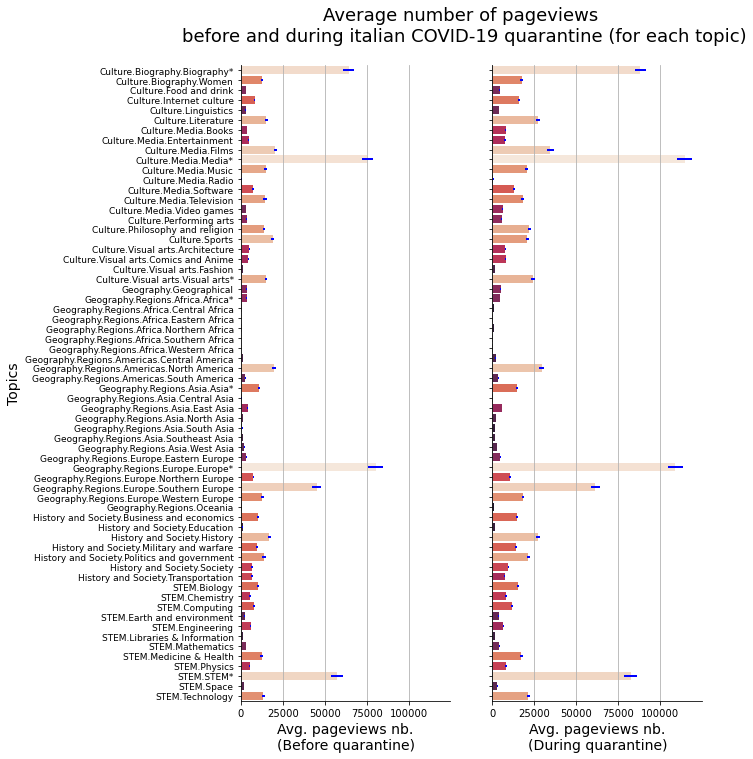

In [27]:
# Plotting with linear scale
get_barplot(before_quarantine_mean, during_quarantine_mean, before_CI, during_CI)

**Something is weird with this plot**: it seems that some topics didn't receive views at all, but this is unlikely. What can we do to have a better visualization? We decide to "sacrifice" the confidence interval for the sake of this question, changing the X axis scale from linear to logarithmic. As you can notice, this new plot gives us more information about the average amount of topics-views, but the confidence interval, with this scale, is almost useless as it has the size of a dot.

From the last two plots we notice that almost every topic has received more views during the lockdown, but it's difficult to understand if people were more interested in a specific topic or in Wikipedia in general and the growth of Wikipedia views has been global.

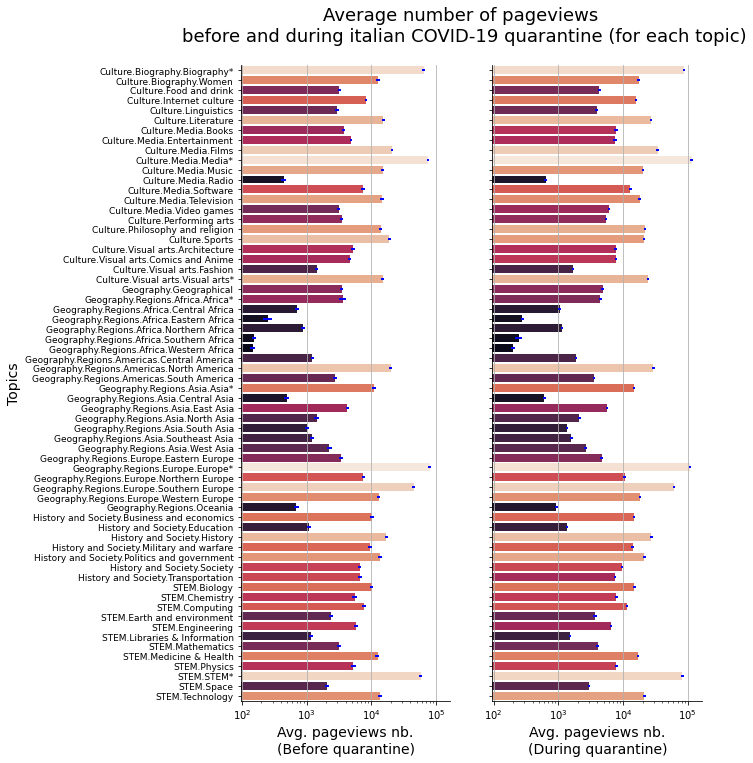

In [28]:
# Plotting with log scale
get_barplot(before_quarantine_mean, during_quarantine_mean, before_CI, during_CI, xscale='log')

### **Task 5.3**

#### *Subtask* 5.3.1

Referring to the previous question, we want to know if a specific topic has received an increment of views proportionally larger than the increment of the others. To do that, we divide the total number of views of each topic, for each day by the total number of views for that day across all the topics. We decide not to divide for the total number of pageviews of that day (that could be obtained by the Articles dataset) because, as we explained before, the number of topic views of one day and the number of pageviews on one day can differ, since an article can be related to more than one topic.

In [29]:
topics_pageview_day

,Date,Pageviews
Topic,,
Culture.Biography.Biography*,2018-01-01,58085
Culture.Biography.Biography*,2018-01-02,86933
Culture.Biography.Biography*,2018-01-03,88693
Culture.Biography.Biography*,2018-01-04,94648
Culture.Biography.Biography*,2018-01-05,90808
...,...,...
STEM.Technology,2020-07-27,11507
STEM.Technology,2020-07-28,11023
STEM.Technology,2020-07-29,11131


In [30]:
# Adding the total number of pageviews for each day to the DataFrame of Task 5.1
daily_pw = articles.sum(axis = 0).to_frame().reset_index().rename(columns={0:'Pageviews', 'index':'Date'})
daily_pw.Date = pd.to_datetime(daily_pw.Date).dt.date
relative_pageviews = topics_pageview_day.reset_index().merge(daily_pw, on = 'Date').set_index('Topic')

# Computing the proportion between the topic views of every topic and the total amount of topic views, for each day
relative_pageviews['Pageviews'] = relative_pageviews.Pageviews_x / relative_pageviews.Pageviews_y

# Dropping the two columns used to compute the final column (Pageviews)
relative_pageviews.drop(['Pageviews_x', 'Pageviews_y'], axis = 1, inplace = True)

relative_pageviews

,Date,Pageviews
Topic,,
Culture.Biography.Biography*,2018-01-01,0.263342
Culture.Biography.Women,2018-01-01,0.056082
Culture.Food and drink,2018-01-01,0.009489
Culture.Internet culture,2018-01-01,0.029202
Culture.Linguistics,2018-01-01,0.007281
...,...,...
STEM.Medicine & Health,2020-07-31,0.029995
STEM.Physics,2020-07-31,0.011454
STEM.STEM*,2020-07-31,0.159550


#### *Subtask* 5.3.2

We use the same plot used before (X axis linear) to visualize the result.

In [31]:
# Getting the pageviews for each topic, for each day (and their mean) between 03/02/2020 and 09/03/2020
before_quarantine_relative, before_quarantine_relative_mean = topic_groups_per_period(relative_pageviews, start=date(2020, 2, 3), end=date(2020, 3, 9))

# Getting the pageviews for each topic, for each day (and their mean) between 09/03/2020 and 12/04/2020
during_quarantine_relative, during_quarantine_reletive_mean = topic_groups_per_period(relative_pageviews, start=date(2020, 3, 9), end=date(2020, 4, 12))

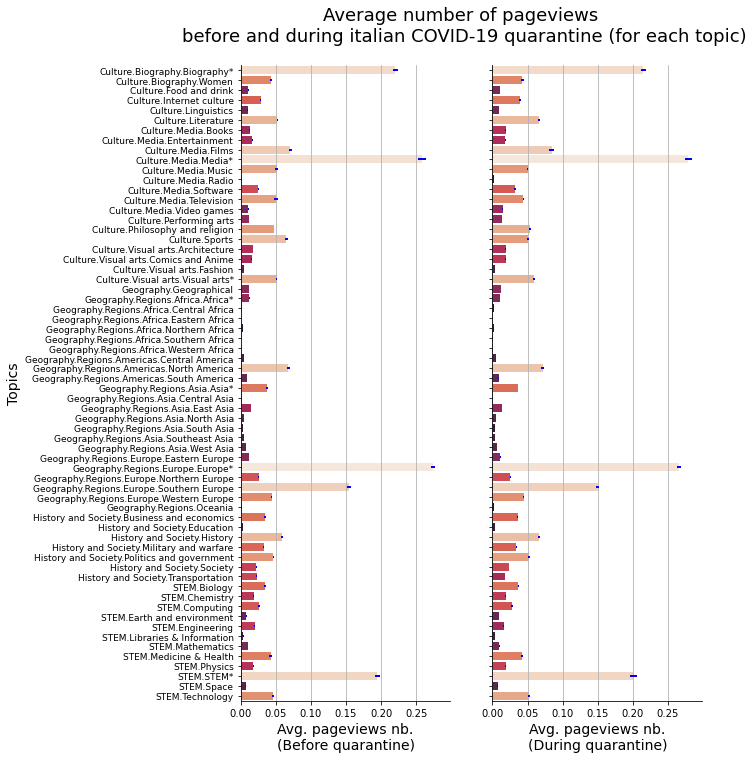

In [32]:
# Computing confidence intervals for the two periods of interest: Before quarantine and during quarantine.
before_CI_R = np.array([compute_CI(group['Pageviews']) for _, group in before_quarantine_relative]).T
during_CI_R = np.array([compute_CI(group['Pageviews']) for _, group in during_quarantine_relative]).T

# Plotting with linear scale
get_barplot(before_quarantine_relative_mean, during_quarantine_reletive_mean, before_CI_R, during_CI_R)

#### *Subtask* 5.3.3

**What is going on?**: The two plots are nearly identical. It seems that each topic received more views during the lockdown, but the distribution of these views is the same as in the period before the aforementioned lockdown. 

Anyway, there are some differences that is important to notice and analyze: 

- _Culture.Biography.Biography*_, in proportion, has received less views.
- On the contrary _Culture.Literature_, _Culture.Media.Books_, _Culture.Media.Films_ and _Culture.Media.Media_ have received more views in proportion. Bingo! Italian people during lockdown were forced to stay home, and that led them to watch more movies / TV Shows and read more books.
- We can also notice that _Culture.Sports_ received significantly less views during quarantine. Why? Simply because there were no sport events!
- _Geography.Regions.Europe.Europe*_ has received less views. Maybe because it was simply impossible to travel, so the interest in this category suffered a setback.
- _STEM.STEM*_ has also received more views, that could confirm the plots of Task 3, although the increment is not as huge as expected.

**In conclusion**: although some articles related to viruses (_Task 3_) received more views during the lockdown, in general, in terms of topics, we notice that Italian people, with more free time to spend at home, wanted a distraction from what was happening to their nation and to the world. Two people in this group are Italian and lived the lockdown on their skin, so we can confirm that, according to what was said by the local news, in Italy the use of streaming services like Netflix, as long as the download of e-books, and in general the interest for movies and books underwent a huge increase during the months of quarantine.